The contents of the "Dataset" folder include:

Dataset Details.docx – Information about the dataset.

Dataset Details.pdf – A PDF version of the dataset details.

In-depth details.pdf – Additional in-depth information related to the project.

Searching for Higgs Boson Decay Modes with Deep Learning.pdf – A research paper that may guide the analysis.

training.csv – The dataset for training the model.

In [ ]:
import zipfile
import os

# Specify the path to your zip file and the directory where it should be extracted
zip_file_path = '/content/Dataset and Research Papers.zip'
extraction_dir = '/content/Higgs_Boson_Detection'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the extracted files to verify
extracted_files = os.listdir(extraction_dir)
extracted_files


['Dataset']

In [ ]:
import os

# List the contents of the current working directory
print(os.listdir('/content/'))


['.config', 'Higgs_Boson_Detection', 'Dataset and Research Papers.zip', 'sample_data']


Load the dataset (training.csv).

Preprocess the data: Handle missing values and any imbalances in the dataset.

Build a classification model.

Evaluate the model using Precision as the primary metric.

In [ ]:
import pandas as pd

# Load the dataset
data_file_path = '/content/Higgs_Boson_Detection/Dataset/training.csv'
df_higgs = pd.read_csv(data_file_path)

# Display the first few rows to understand the structure
df_higgs.head()


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


2. Handle missing values
In the dataset, missing values are typically represented by -999.000. These need to be handled before further analysis. We can replace -999.000 with NaN and then fill missing values using median imputation.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace -999.000 with NaN for handling missing values
df_higgs.replace(-999.000, np.nan, inplace=True)

# Separate features and target variable
X = df_higgs.drop(columns=['EventId', 'Weight', 'Label'])  # Remove irrelevant columns for model
y = df_higgs['Label']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)


3. Encode the labels
The target variable, Label, is categorical ('s' for signal, 'b' for background). We need to encode this into numeric values where 's' becomes 1 and 'b' becomes 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels ('s' = 1 for signal, 'b' = 0 for background noise)
le = LabelEncoder()
y = le.fit_transform(y)


4. Split the dataset into training and testing sets
To evaluate the performance of the model, we split the dataset into training and testing sets. The split ratio is typically 80% for training and 20% for testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((200000, 30), (50000, 30), (200000,), (50000,))

5. Build and train a classification model
We can now build a classification model. In this example, I'll use a Random Forest Classifier, but other models like Logistic Regression or Gradient Boosting can also be used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

6. Evaluate the model using Precision
The evaluation metric for this task is Precision, which is crucial when detecting signals in an imbalanced dataset (as signals are rare compared to background noise).

In [ ]:
from sklearn.metrics import precision_score

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Precision
precision = precision_score(y_test, y_pred)

# Output the Precision score
print(f"Precision: {precision}")


Precision: 0.7941526656965207


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Evaluate the model using additional metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.83918
Recall: 0.7089459698848538
F1 Score: 0.7491342464043926


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf

# Load the dataset
data_file_path = '/content/Higgs_Boson_Detection/Dataset/training.csv'
df_higgs = pd.read_csv(data_file_path)

# Replace -999.000 with NaN for handling missing values
df_higgs.replace(-999.000, np.nan, inplace=True)

# Separate features and target variable
X = df_higgs.drop(columns=['EventId', 'Weight', 'Label'])  # Remove irrelevant columns for model
y = df_higgs['Label']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Encode the labels ('s' = 1 for signal, 'b' = 0 for background noise)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values for deep learning model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the deep learning model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Add some dropout for regularization
model.add(Dense(64, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,625 (72.75 KB)

 Trainable params: 18,625 (72.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.8059 - loss: 0.4225 - precision: 0.7513 - val_accuracy: 0.8324 - val_loss: 0.3691 - val_precision: 0.7657
Epoch 2/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8329 - loss: 0.3757 - precision: 0.7859 - val_accuracy: 0.8358 - val_loss: 0.3636 - val_precision: 0.7903
Epoch 3/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8362 - loss: 0.3684 - precision: 0.7899 - val_accuracy: 0.8385 - val_loss: 0.3590 - val_precision: 0.7850
Epoch 4/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8380 - loss: 0.3661 - precision: 0.7915 - val_accuracy: 0.8391 - val_loss: 0.3569 - val_precision: 0.7700
Epoch 5/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8413 - loss: 0.3612 - precision: 0.7956 - val_accuracy: 0.8390 - val_loss: 0.3561 - val_precision: 0.7912
Epoch 6/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8406 - loss: 0.3604 - precision: 0.7954 - val_accuracy: 

In [ ]:
# Evaluate the model
loss, accuracy, precision = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8391 - loss: 0.3583 - precision: 0.7842
Test Accuracy: 0.8402199745178223
Test Precision: 0.785668671131134


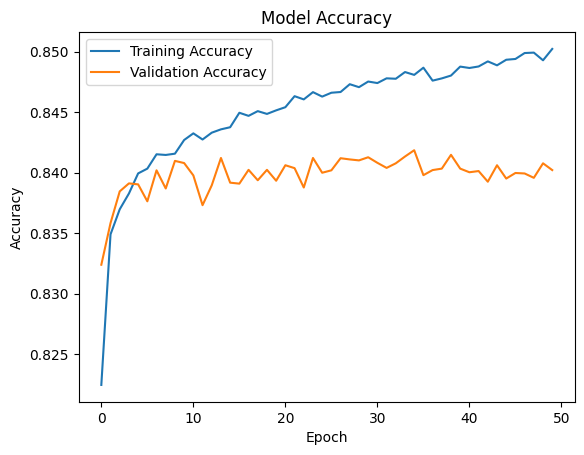

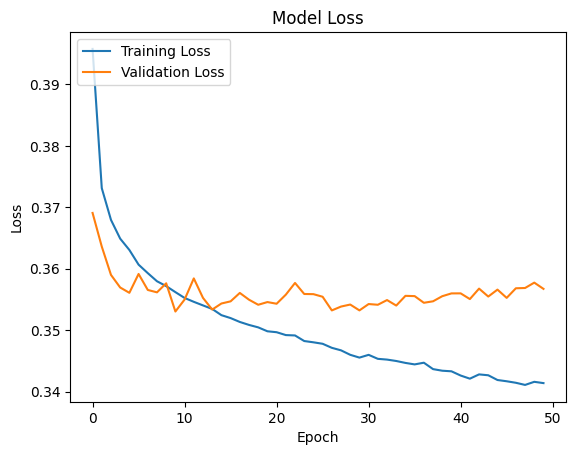

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
